# Flight Data 2008 Exploration
## by Sridhar Sivanand

## Preliminary Wrangling

> The Flight Data for the year 2008 is being explored in this project

In [59]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading the Dataset

In [60]:
df_2008 = pd.read_csv("2008.csv")

In [61]:
df_2008.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [62]:
df_2008[['ArrTime', 'CRSArrTime', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].sample(10)

,ArrTime,CRSArrTime,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
585729,924.0,933,NaN,NaN,NaN,NaN,NaN,NaN
4244630,1202.0,1205,NaN,NaN,NaN,NaN,NaN,NaN
2897106,1722.0,1725,NaN,NaN,NaN,NaN,NaN,NaN
4807527,1916.0,1920,NaN,NaN,NaN,NaN,NaN,NaN
6489971,1429.0,1335,NaN,0.0,0.0,11.0,0.0,43.0
3225818,1819.0,1804,NaN,0.0,0.0,15.0,0.0,0.0
5439384,1716.0,1720,NaN,NaN,NaN,NaN,NaN,NaN
307148,2136.0,2037,NaN,24.0,0.0,35.0,0.0,0.0
6291344,821.0,820,NaN,NaN,NaN,NaN,NaN,NaN
42314,821.0,830,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_2008[['Month', 'DayOfWeek']].head()

,Month,DayOfWeek
0,1,4
1,1,4
2,1,4
3,1,4
4,1,4


### What is the structure of your dataset?

> The data consists of over 7 million records. A few observations
- The number of different cities in Origin and Destination columns is huge. Using Origin or Destination as a categorical variable would be difficult

### What is/are the main feature(s) of interest in your dataset?

> The areas of interest are flight patterns, flight delay analysis and flight cancellations

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Columns of Interest
- Flight Patterns - Departure Time, Month, Day of week, Origin city, Destination city etc
- Flight Delays - Arrival Delay, Origin city, the delay types
- Flight Cancellations - Cancellation, Cancellation Codes, Origin City, Month, Day of Week etc


In [64]:
# Converting the Month and Day of Week into appropriate Categorical Values
# Day of Week starts with 1 = Monday
cat_month_week = {"DayOfWeek": {1:"Mon", 2:"Tue", 3: "Wed", 4: "Thu", 5:"Fri", 6:"Sat", 7: "Sun"},
                 "Month" : {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5: "May", 6: "Jun", 7:"Jul", 8:"Aug", 
                            9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}}
df_2008.replace(cat_month_week, inplace=True)
df_2008[['Month', 'DayOfWeek']].head()

,Month,DayOfWeek
0,Jan,Thu
1,Jan,Thu
2,Jan,Thu
3,Jan,Thu
4,Jan,Thu


In [65]:
# Adding a Flight Status column for ease of analysis later on
df_2008['FlightStatus'] = "On Time"
df_2008.loc[(df_2008['Cancelled'] == 1), 'FlightStatus'] = 'Cancelled'
df_2008.loc[df_2008['ArrDelay'] >= 15, 'FlightStatus'] = 'Delayed' 
df_2008.sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
4614325,2008,Aug,6,Wed,227.0,230,527.0,520,HA,17,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
2835208,2008,May,15,Thu,1900.0,1903,1922.0,1919,NW,1249,...,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
5903175,2008,Oct,29,Wed,1317.0,1225,1805.0,1714,CO,1136,...,29.0,0,NaN,0,0.0,0.0,51.0,0.0,0.0,Delayed
3073218,2008,Jun,25,Wed,1425.0,1420,1532.0,1530,WN,2292,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
4586078,2008,Aug,16,Sat,901.0,830,1028.0,951,F9,262,...,24.0,0,NaN,0,0.0,0.0,6.0,0.0,31.0,Delayed
1254271,2008,Mar,26,Wed,1822.0,1820,1927.0,1930,WN,2821,...,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
6210742,2008,Nov,20,Thu,1858.0,1850,2203.0,2150,DL,799,...,29.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
4143800,2008,Jul,4,Fri,1254.0,1255,1859.0,1905,AA,2074,...,32.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
3448070,2008,Jun,29,Sun,657.0,700,725.0,736,NW,1580,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time
5144643,2008,Sep,18,Thu,1226.0,1225,1329.0,1318,EV,4713,...,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,On Time


## Univariate Exploration

### Analyzing Flight Patterns

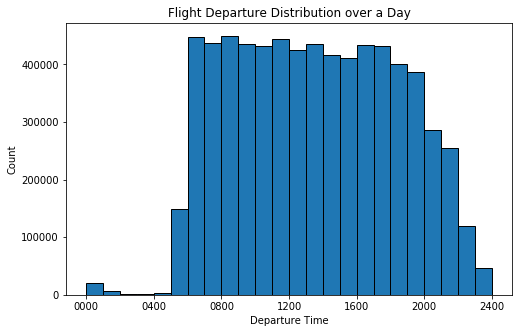

In [66]:
# Observing the distribution of flight departure times over a day.
binsize = 100
bins = np.arange(0, df_2008['DepTime'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2008, x = 'DepTime', edgecolor = 'black', bins = bins)
plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], ['0000','0400', '0800', '1200', '1600', '2000', '2400'])
plt.xlabel('Departure Time')
plt.ylabel('Count')
plt.title('Flight Departure Distribution over a Day')
plt.show()

- The bulk of the flight departure times are between 6 am and 8 pm
- The number flights departing after 8 pm declines until past midnight
- There are very few flights between midnight and 5 am.

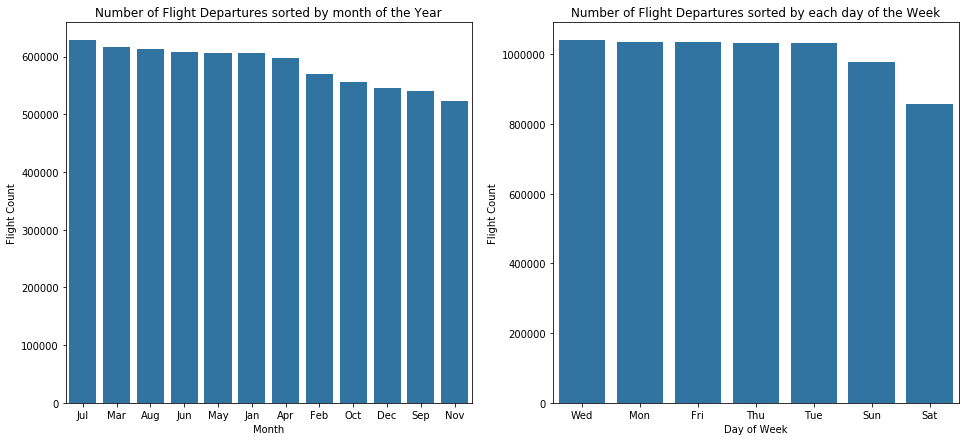

In [67]:
# Number of flights by month and by day of the week
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.countplot(data = df_2008, x ='Month', color = base_color,
            order=df_2008.Month.value_counts().index)
plt.ylabel('Flight Count')
plt.title('Number of Flight Departures sorted by month of the Year')

plt.subplot(1, 2, 2)
sb.countplot(data = df_2008, x ='DayOfWeek', color = base_color, 
             order=df_2008.DayOfWeek.value_counts().index)
plt.ylabel('Flight Count')
plt.xlabel('Day of Week')
plt.title('Number of Flight Departures sorted by each day of the Week');

- The number of flights peaks in July and is the lowest in November
<br>
- The number of flights are the highest on Wednesdays and lowest on Saturdays .In general weekends have lesser number of flights than weekdays.

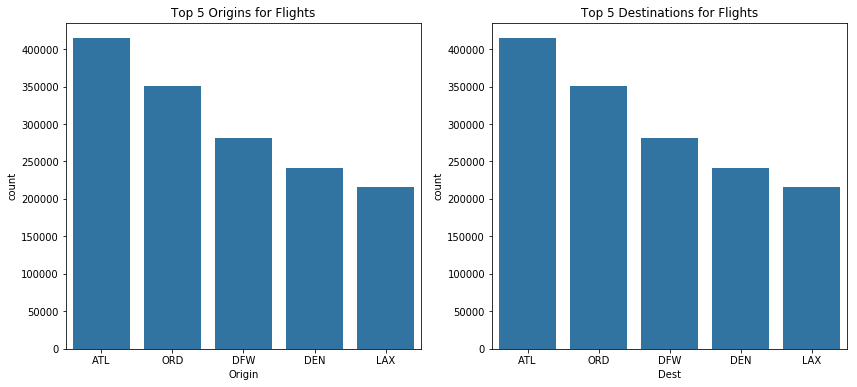

In [68]:
# Observing the flight Origin and Destination. Since there are too many cities in the dataset, only th top 5 are observed.
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
#base_color = sb.color_palette()[0]
sb.countplot(data = df_2008, x ='Origin', color = base_color, 
             order=df_2008.Origin.value_counts().nlargest(5).index)
plt.title('Top 5 Origins for Flights');

plt.subplot(1, 2, 2)
sb.countplot(data = df_2008, x ='Dest', color = base_color, 
             order=df_2008.Dest.value_counts().nlargest(5).index)
plt.title('Top 5 Destinations for Flights');

The top 5 Origin and Destinations in terms of number of flights are the same

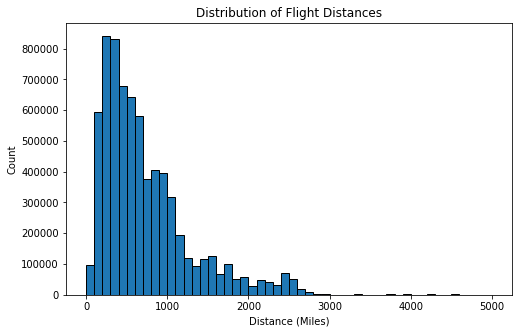

In [69]:
# Analyzing Flight Distance
binsize = 100
bins = np.arange(0, df_2008['Distance'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2008, x = 'Distance', edgecolor = 'black', bins = bins)
#plt.xticks([0, 400, 800, 1200, 1600, 2000, 2400], ['0000','0400', '0800', '1200', '1600', '2000', '2400'])
plt.xlabel('Distance (Miles)')
plt.ylabel('Count')
plt.title('Distribution of Flight Distances')
plt.show()

The Distance values seem to be right skewed. Trying a log transform

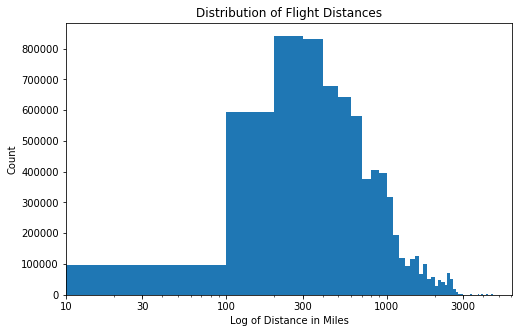

In [70]:
bin_edges = 10 ** np.arange(0.8, np.log10(df_2008['Distance'].max())+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_2008, x = 'Distance', bins = bins)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel('Log of Distance in Miles')
plt.ylabel('Count')
plt.title('Distribution of Flight Distances')
plt.show()

The Log transform didn't help too much in getting a normal distribution.

### Analyzing Delays

In [71]:
df_2008['ArrDelay'].describe()

count    6.855029e+06
mean     8.168452e+00
std      3.850194e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64

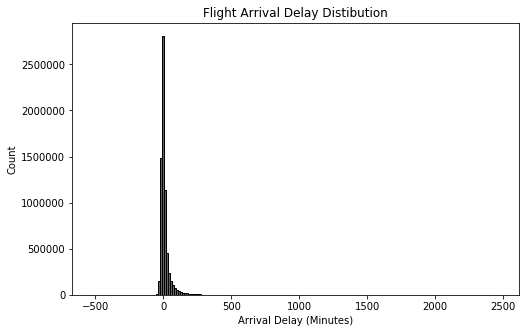

In [72]:
# Observing the distribution of flight arrival delays over a day.
binsize = 15
bins = np.arange(-520, df_2008['ArrDelay'].max() + binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_2008, x = 'ArrDelay', edgecolor = 'black', bins = bins)
plt.xlabel('Arrival Delay (Minutes)')
plt.ylabel('Count')
plt.title('Flight Arrival Delay Distibution')
plt.show()

The flight arrival delay seems right skewed. Can't do a log transform as the data had negative and 0 values

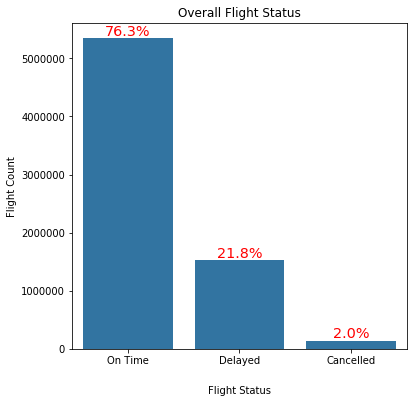

In [73]:
# Observing the Flight Delays in terms of Flight Status. On time is arrival delay less than 15 minutes.
plt.figure(figsize = [6, 6])
base_color = sb.color_palette()[0]
sb.countplot(data = df_2008, x ='FlightStatus', color = base_color,
            order=df_2008.FlightStatus.value_counts().index)
plt.xlabel('Flight Status', labelpad=20)
plt.ylabel('Flight Count')
plt.title('Overall Flight Status')

n_points = df_2008.shape[0]
cat_counts = df_2008['FlightStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')

In terms of flight status more than 75% of the flights are on time, almost 22% are delayed and 2% are cancelled

In [74]:
# Create a dataframe with only the rows for flights that were delayed. Looking at the dataset, a flight is considered "delayed" 
# if the delay is at least 15 minutes. If the delay exceeds 15 minutes the delay cause breakdown is given in the dataset
df_2008_delay = df_2008.loc[df_2008['ArrDelay'] >= 15]

In [75]:
df_2008_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524735 entries, 4 to 7009721
Data columns (total 30 columns):
Year                 1524735 non-null int64
Month                1524735 non-null object
DayofMonth           1524735 non-null int64
DayOfWeek            1524735 non-null object
DepTime              1524735 non-null float64
CRSDepTime           1524735 non-null int64
ArrTime              1524735 non-null float64
CRSArrTime           1524735 non-null int64
UniqueCarrier        1524735 non-null object
FlightNum            1524735 non-null int64
TailNum              1524733 non-null object
ActualElapsedTime    1524735 non-null float64
CRSElapsedTime       1524735 non-null float64
AirTime              1524735 non-null float64
ArrDelay             1524735 non-null float64
DepDelay             1524735 non-null float64
Origin               1524735 non-null object
Dest                 1524735 non-null object
Distance             1524735 non-null int64
TaxiIn               1524735 no

In [76]:
# Analyzing the distribution of the delay factors
carrier_delay = df_2008_delay.CarrierDelay.sum()
weather_delay = df_2008_delay.WeatherDelay.sum()
nas_delay = df_2008_delay.NASDelay.sum()
security_delay = df_2008_delay.SecurityDelay.sum()
late_aircraft_delay = df_2008_delay.LateAircraftDelay.sum()
sizes = [carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay]

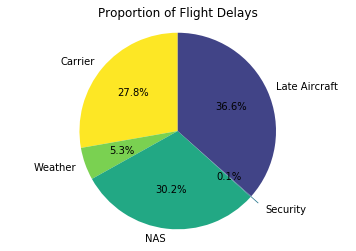

In [77]:
labels = 'Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft'
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 4th slice (i.e. 'Security')
fig1, ax1 = plt.subplots()
theme = plt.get_cmap('viridis_r')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Flight Delays')
plt.show()

Late Aircraft causes the most overall delays followed by NAS, Carrier, Weather and Security. Security and Weather are negligible and could be lumped to gether under "others" to make the pie chart "acceptable" in the explanatory slides or alternately a barchart with percentages can be used.
<br>
<br>
Trying out the bar chart and a cleaned up pie chart below

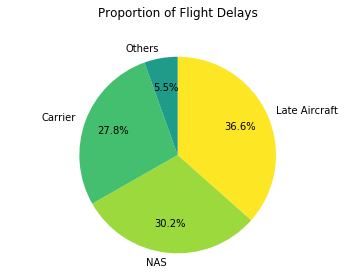

In [81]:
# Cleaned up pie chart. May not use this though
other_delay = security_delay + weather_delay
labels = 'Late Aircraft', 'NAS', 'Carrier', 'Others', 
sizes_with_other = [ late_aircraft_delay, nas_delay, carrier_delay, other_delay ]
explode = (0, 0, 0, 0)  # only "explode" the 4th slice (i.e. 'Security')
fig1, ax1 = plt.subplots()
theme = plt.get_cmap('viridis_r')
ax1.set_prop_cycle("color", [theme(0.6 * i / len(sizes_with_other))
                             for i in range(len(sizes_with_other))])
ax1.pie(sizes_with_other, explode=explode, labels=labels, autopct='%1.1f%%', pctdistance=0.7, 
        shadow=False, startangle=90, counterclock=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Flight Delays', pad=30)
plt.show()

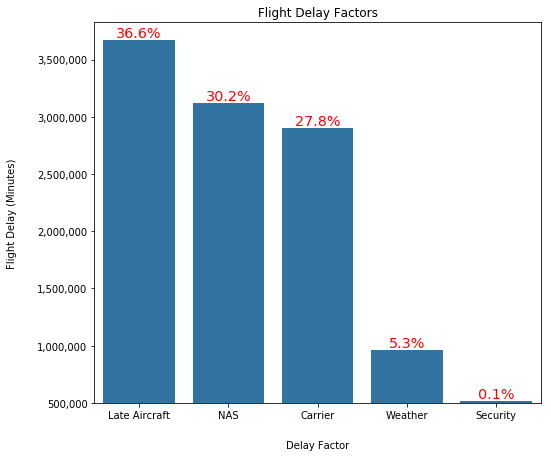

In [78]:
# Bar Chart for the arrival delay factors
plt.figure(figsize = [8, 7])
x_labels = {'Late Aircraft': 'LateAircraftDelay', 'NAS':'NASDelay', 'Carrier':'CarrierDelay',
           'Weather': 'WeatherDelay', 'Security': 'SecurityDelay'}
y_labels = {'500,000': 500000, '1,000,000': 1000000, '1,500,000': 1500000, '2,000,000': 2000000, 
            '2,500,000':2500000, '3,000,000':3000000, '3,500,000':3500000}
delay_factor_series = df_2008_delay[['CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay', 'SecurityDelay']].sum()
delay_factor_series.sort_values(ascending=False, inplace=True)

ax = sb.barplot(delay_factor_series.index, delay_factor_series.values, color = base_color)
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
plt.xlabel('Delay Factor', labelpad=20)
plt.ylabel('Flight Delay (Minutes)', labelpad=20)
plt.title('Flight Delay Factors');

n_points = delay_factor_series.shape[0]
locs, labels = plt.xticks() # get the current tick locations and labels
total_delay = delay_factor_series.nlargest(5).values.sum()

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = delay_factor_series.get(x_labels.get(label.get_text()))
    pct_string = '{:0.1f}%'.format(100*count/total_delay)

    # print the annotation just above the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')


Late aircraft is the largest factor for flight delays, causing 36.6% of the delays 

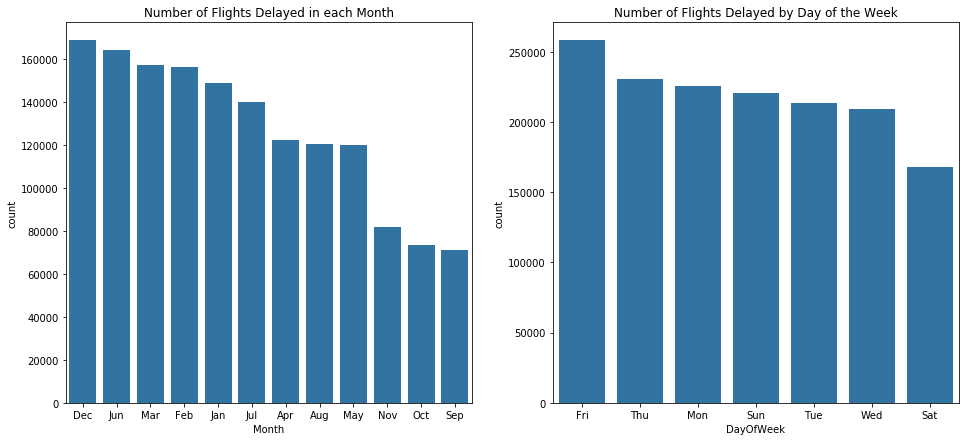

In [82]:
# Delayed flights across months and days of week
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.countplot(data = df_2008_delay, x ='Month', color = base_color,
            order=df_2008_delay.Month.value_counts().index)
plt.title('Number of Flights Delayed in each Month')

plt.subplot(1, 2, 2)
sb.countplot(data = df_2008_delay, x ='DayOfWeek', color = base_color, 
             order=df_2008_delay.DayOfWeek.value_counts().index)
plt.title('Number of Flights Delayed by Day of the Week');

- Flight delays are highest in December and lowest in September
- Flight delays are highest on Fridays and lowest on Saturdays

### Analyzing Cancellations

In [83]:
# Observing the rows of flights that were cancelled
df_2008_cancelled = df_2008.loc[df_2008['Cancelled'] != 0]

In [84]:
# Rename the cancellation Codes
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'A'), 'CancellationCode'] = 'carrier'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'B'), 'CancellationCode'] = 'weather'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'C'), 'CancellationCode'] = 'NAS'
df_2008_cancelled.loc[(df_2008_cancelled['CancellationCode'] == 'D'), 'CancellationCode'] = 'security'
df_2008_cancelled.sample(10)

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
178500,2008,Jan,6,Sun,NaN,2050,NaN,2157,OO,6047,...,NaN,1,weather,0,NaN,NaN,NaN,NaN,NaN,Cancelled
4713458,2008,Aug,15,Fri,NaN,745,NaN,1620,AA,34,...,NaN,1,weather,0,NaN,NaN,NaN,NaN,NaN,Cancelled
6488456,2008,Dec,10,Wed,NaN,1100,NaN,1310,WN,49,...,NaN,1,carrier,0,NaN,NaN,NaN,NaN,NaN,Cancelled
2150848,2008,Apr,18,Fri,NaN,1512,NaN,1657,FL,984,...,NaN,1,carrier,0,NaN,NaN,NaN,NaN,NaN,Cancelled
3050886,2008,Jun,19,Thu,NaN,1900,NaN,2005,WN,2976,...,NaN,1,carrier,0,NaN,NaN,NaN,NaN,NaN,Cancelled
4660280,2008,Aug,10,Sun,NaN,2235,NaN,2359,MQ,4761,...,NaN,1,NAS,0,NaN,NaN,NaN,NaN,NaN,Cancelled
6184265,2008,Nov,20,Thu,NaN,1715,NaN,1837,US,799,...,NaN,1,carrier,0,NaN,NaN,NaN,NaN,NaN,Cancelled
6341054,2008,Nov,25,Tue,NaN,1017,NaN,1155,9E,2364,...,NaN,1,weather,0,NaN,NaN,NaN,NaN,NaN,Cancelled
4953257,2008,Sep,12,Fri,NaN,1655,NaN,1855,XE,2539,...,NaN,1,weather,0,NaN,NaN,NaN,NaN,NaN,Cancelled
165397,2008,Jan,25,Fri,NaN,1150,NaN,1423,OH,5388,...,NaN,1,carrier,0,NaN,NaN,NaN,NaN,NaN,Cancelled


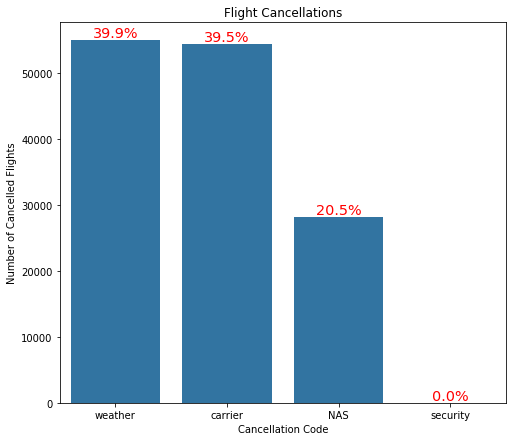

In [85]:
# Examining the proportion of different cancellation Factors
plt.figure(figsize=[8, 7])
base_color = sb.color_palette()[0]
sb.countplot(data = df_2008_cancelled, x ='CancellationCode', color = base_color,
             order = df_2008_cancelled['CancellationCode'].value_counts().index)
n_points = df_2008_cancelled.shape[0]
cat_counts = df_2008_cancelled['CancellationCode'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just above the top of the bar.
    # For some wierd reason only with va='bottom', am I able to get the % above the bor.
    plt.text(loc, count-8, pct_string, ha = 'center', size='x-large', va='bottom', color = 'r')
    
plt.xlabel('Cancellation Code')
plt.ylabel('Number of Cancelled Flights')
plt.title('Flight Cancellations');

The largest causes for flight cancellations were weather, followed closely by carrier. There were hardly any cancellations due to security

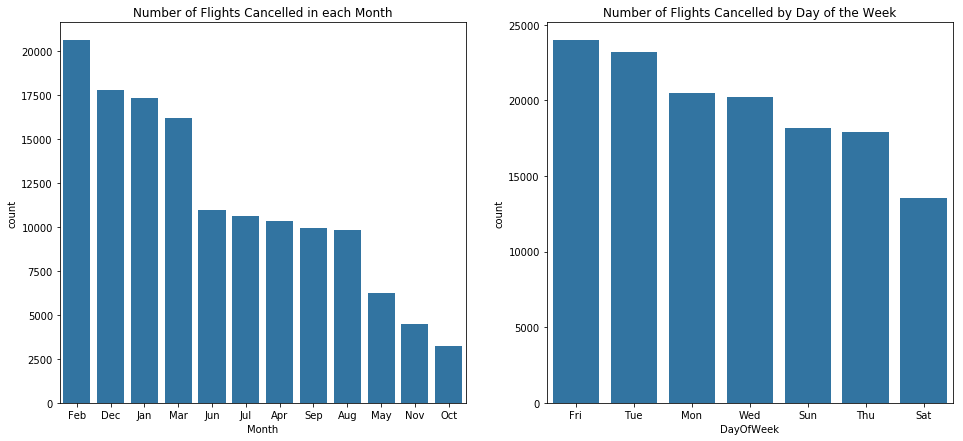

In [86]:
plt.figure(figsize = [16, 7])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.countplot(data = df_2008_cancelled, x ='Month', color = base_color,
            order=df_2008_cancelled.Month.value_counts().index)
plt.title('Number of Flights Cancelled in each Month')

plt.subplot(1, 2, 2)
sb.countplot(data = df_2008_cancelled, x ='DayOfWeek', color = base_color, 
             order=df_2008_cancelled.DayOfWeek.value_counts().index)
plt.title('Number of Flights Cancelled by Day of the Week');

- The largest number of cancellations were in the winter months of December, january and February, with February being the highest.
- Day of the week may not be too relevant, but from the data the largest number of cancellations occurred on a Friday.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were a few outliers in Arrival delay. There were some negative values indicating that some flights were early. So a log transform or square root transform weren't appropriate. So no transformations were done.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Flights are deemed on time if the arrival delay is less than 15 minutes. Only if the flights are deemed delayed are values for the delay categories provided.
- The DayOfWeek and Month should be categorical variables but were represented as numeric.
- Added a new column called Flight Status for ease of analysis.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Analyzing Flight Delays

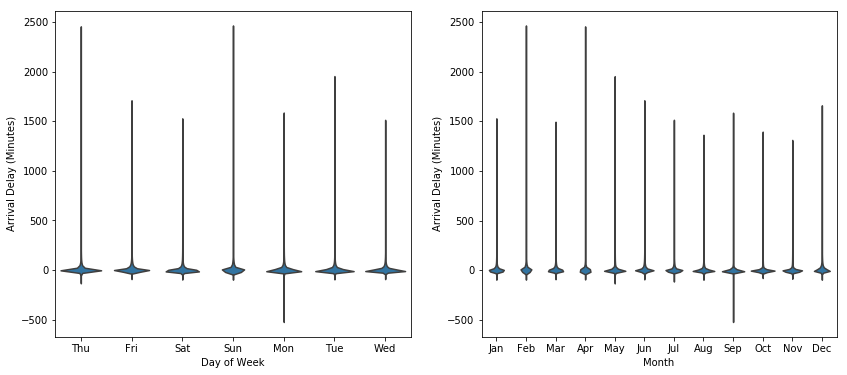

In [87]:
# Violin Plots For
# 1) Arrival Delay Vs Day of the Week
# 2) Arrival Delay vs Month
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
ax = sb.violinplot(data = df_2008, x = 'DayOfWeek', y = 'ArrDelay', color = base_color,
              inner = None);
ax.set(xlabel='Day of Week', ylabel='Arrival Delay (Minutes)')

plt.subplot(1, 2, 2)
ax = sb.violinplot(data = df_2008, x = 'Month', y = 'ArrDelay', color = base_color,
              inner = None);
ax.set(xlabel='Month', ylabel='Arrival Delay (Minutes)');

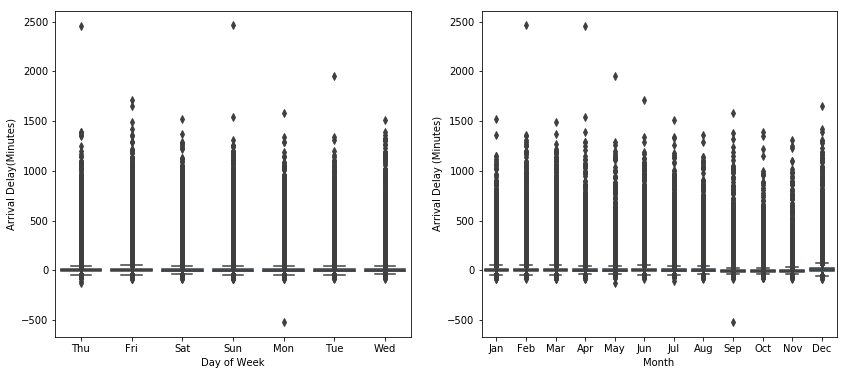

In [88]:
# Box Plots For
# 1) Arrival Delay Vs Day of the Week
# 2) Arrival Delay vs Month
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
ax = sb.boxplot(data = df_2008, x = 'DayOfWeek', y = 'ArrDelay', color = base_color)
ax.set(xlabel='Day of Week', ylabel='Arrival Delay(Minutes)')
# plt.xticks(y_pos, objects);
plt.subplot(1, 2, 2)
ax = sb.boxplot(data = df_2008, x = 'Month', y = 'ArrDelay', color = base_color)
ax.set(xlabel='Month', ylabel='Arrival Delay (Minutes)');

In [89]:
print(df_2008['ArrDelay'].describe())
print(df_2008['ArrDelay'].median())

count    6.855029e+06
mean     8.168452e+00
std      3.850194e+01
min     -5.190000e+02
25%     -1.000000e+01
50%     -2.000000e+00
75%      1.200000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64
-2.0


More than 50% of the flights arrive before scheduled arrival. However, it is difficult to interpret these plots as the outliers are very large, making reading of the plots extremely difficult. So will trying again after removing most of the outliers

In [90]:
df_2008_subset = df_2008.loc[(df_2008['ArrDelay'] < 100) & (df_2008['ArrDelay'] > -50)]

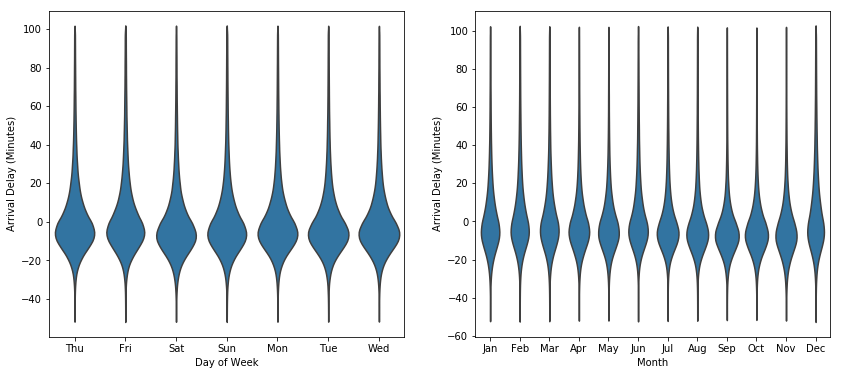

In [91]:
# Violin Plots For
# 1) Arrival Delay Vs Day of the Week
# 2) Arrival Delay vs Month
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
ax = sb.violinplot(data = df_2008_subset, x = 'DayOfWeek', y = 'ArrDelay', color = base_color,
              inner = None);
ax.set(xlabel='Day of Week', ylabel='Arrival Delay (Minutes)')

plt.subplot(1, 2, 2)
ax = sb.violinplot(data = df_2008_subset, x = 'Month', y = 'ArrDelay', color = base_color,
              inner = None);
ax.set(xlabel='Month', ylabel='Arrival Delay (Minutes)');

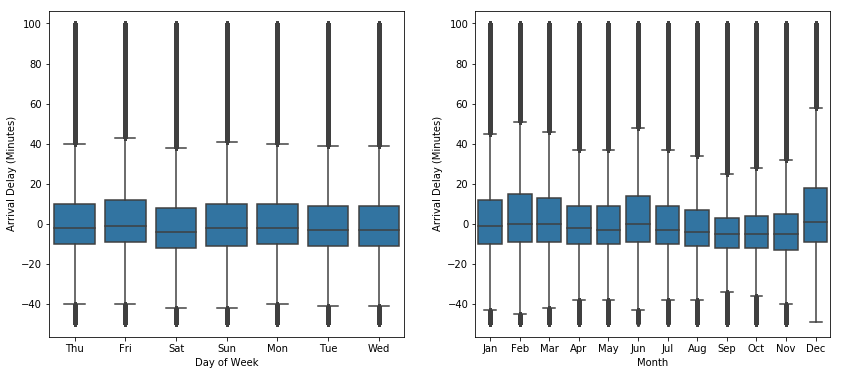

In [92]:
# Box Plots For
# 1) Arrival Delay Vs Day of the Week
# 2) Arrival Delay vs Month
plt.figure(figsize=[14, 6])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
base_color = sb.color_palette()[0]
ax = sb.boxplot(data = df_2008_subset, x = 'DayOfWeek', y = 'ArrDelay', color = base_color)
ax.set(xlabel='Day of Week', ylabel='Arrival Delay (Minutes)')
# plt.xticks(y_pos, objects);
plt.subplot(1, 2, 2)
ax = sb.boxplot(data = df_2008_subset, x = 'Month', y = 'ArrDelay', color = base_color)
ax.set(xlabel='Month', ylabel='Arrival Delay (Minutes)');

- Looking at the plots, the median for Arrival Delay in most cases is below 20 minutes. The Arrival Delays seem more during  December. 

- The day of week observation indicates that the arrival delay median is more from Fridays.
- The variance seems to be the most for the month of December

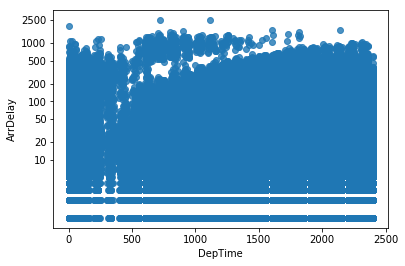

In [ ]:
# Trying a square to make negative values positive and then log
def square_log_trans(x, inverse = False):
    if not inverse:
        return np.log10(np.square(x))
    else:
        return np.power(10, x)
    
sb.regplot(df_2008['DepTime'], df_2008['ArrDelay'].apply(square_log_trans))
tick_locs = [10, 20, 50, 100, 200, 500, 1000, 2500]
plt.yticks(square_log_trans(tick_locs), tick_locs)
plt.show();

No discernable pattern seen between arrival delay and departure time

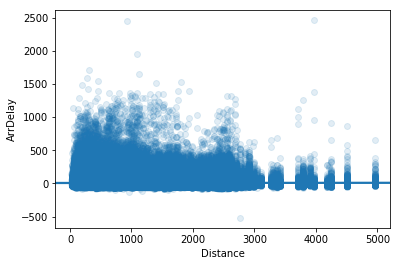

In [ ]:
# Checking if there is a relationship between flight distance and Arrival delays. A possibility is shorter flights might be 
# more sensitive to any delays.
sb.regplot(data = df_2008, x = 'Distance', y = 'ArrDelay', fit_reg = True,
           scatter_kws = {'alpha' : 1/8})
plt.show();

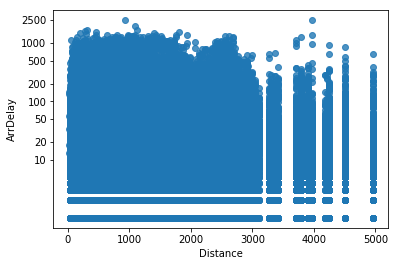

In [ ]:
# Trying a square to make negative values positive and then log
def square_log_trans(x, inverse = False):
    if not inverse:
        return np.log10(np.square(x))
    else:
        return np.power(10, np.sqrt(x))
        
    
sb.regplot(df_2008['Distance'], df_2008['ArrDelay'].apply(square_log_trans))
tick_locs = [10, 20, 50, 100, 200, 500, 1000, 2500]
plt.yticks(square_log_trans(tick_locs), tick_locs)
plt.show();

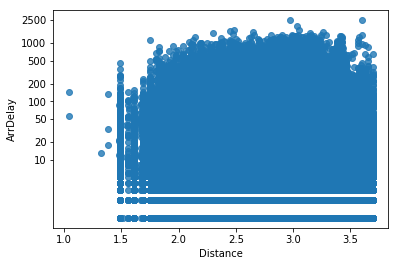

In [ ]:
# Trying a log of distance as well
def square_log_trans(x, inverse = False):
    if not inverse:
        return np.log10(np.square(x))
    else:
        return np.power(10, np.sqrt(x))
        
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
sb.regplot(df_2008['Distance'].apply(log_trans), df_2008['ArrDelay'].apply(square_log_trans))
tick_locs = [10, 20, 50, 100, 200, 500, 1000, 2500]
plt.yticks(square_log_trans(tick_locs), tick_locs)
plt.show();

No pattern discerned from the scatter plots between distance and arrival delay

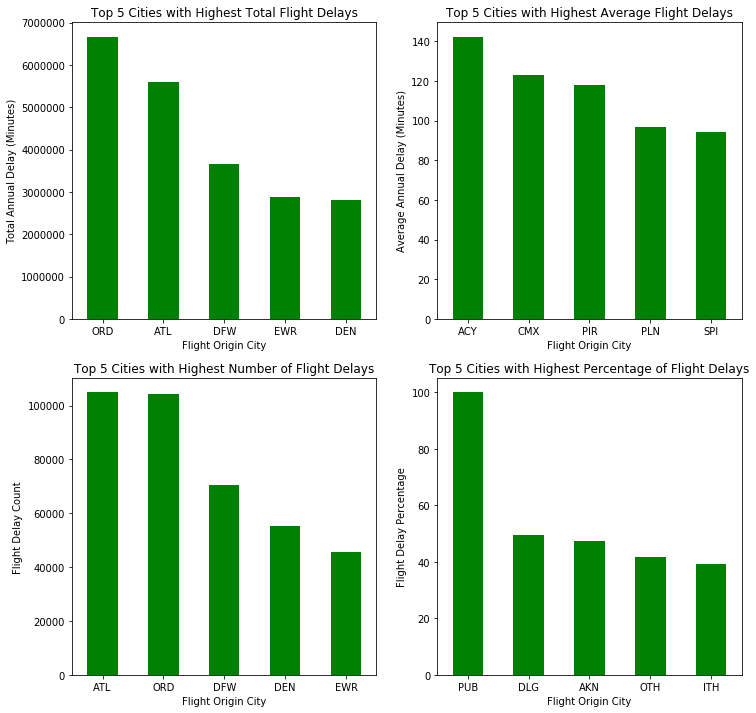

In [93]:
# Analyzing Arrival Delay using Origin City 
plt.figure(figsize=[12, 12])

# Highest Total Flight Delays (Given that the flight was delayed)
plt.subplot(2, 2, 1)
series_delay_sum = df_2008_delay.groupby(['Origin'])['ArrDelay'].sum().nlargest(5)
series_delay_sum.plot.bar(title='Top 5 Cities with Highest Total Flight Delays', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Total Annual Delay (Minutes)');

# Highest Average Flight Delays (Given that the flight was delayed)
plt.subplot(2, 2, 2)
delay_mean_series = df_2008_delay.groupby(['Origin'])['ArrDelay'].mean().nlargest(5)
delay_mean_series.plot.bar(title='Top 5 Cities with Highest Average Flight Delays', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Average Annual Delay (Minutes)');

# Highest number of Flights that were deemed delayed
plt.subplot(2, 2, 3)
delay_count_series = df_2008_delay.groupby(['Origin'])['ArrDelay'].count().nlargest(5)
delay_count_series.plot.bar(title='Top 5 Cities with Highest Number of Flight Delays', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Flight Delay Count');

# Highest percentage of flights that were deemed delayed
plt.subplot(2, 2, 4)
delayed_origin_count = df_2008_delay.groupby(['Origin']).agg({'ArrDelay': 'count'})
origin_count = df_2008.groupby(['Origin']).agg({'ArrDelay': 'count'})
delayed_percentage = delayed_origin_count.div(origin_count, level='Origin') * 100
delayed_percentage_largest = delayed_percentage['ArrDelay'].nlargest(5)
delayed_percentage_largest.plot.bar(title='Top 5 Cities with Highest Percentage of Flight Delays', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Flight Delay Percentage');

- ORD has the highest flight delay in minutes of the delayed flights - over a 6,000,000 minutes
- ACY has average flight delay of about 140 minutes of the delayed flights
- ATL had the highest number of delayed flights. Over 100,000
- PUB had the highest percentage of delayed flights - 100%

### Analyzing Cancellations

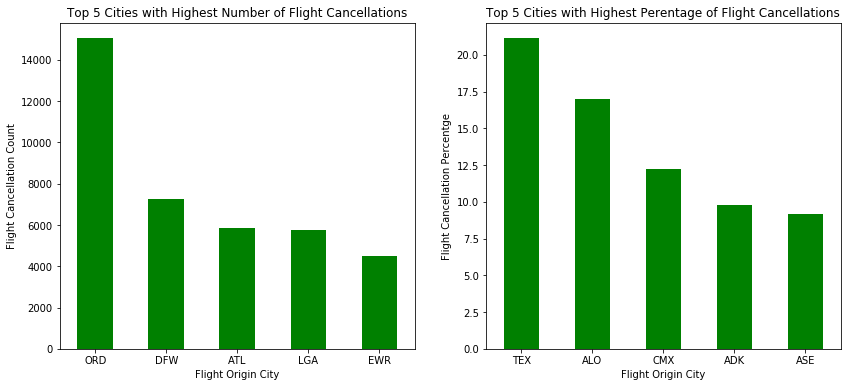

In [94]:
# Analyzing Flight Cancellations by Origin City
plt.figure(figsize=[14, 6])

plt.subplot(1, 2, 1)
cancelled_count_series = df_2008.groupby(['Origin'])['Cancelled'].sum().nlargest(5)
cancelled_count_series.plot.bar(title='Top 5 Cities with Highest Number of Flight Cancellations', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Flight Cancellation Count');

plt.subplot(1, 2, 2)
cancelled_sum = df_2008.groupby(['Origin']).agg({'Cancelled': 'sum'})
cancelled_count = df_2008.groupby(['Origin']).agg({'Cancelled': 'count'})
cancelled_percentage = cancelled_sum.div(cancelled_count, level='Origin') * 100
cancelled_percentage_largest = cancelled_percentage['Cancelled'].nlargest(5)
cancelled_percentage_largest.plot.bar(title='Top 5 Cities with Highest Perentage of Flight Cancellations', rot=360, color='g')
plt.xlabel('Flight Origin City')
plt.ylabel('Flight Cancellation Percentge');

- ORD had the highest number of cancelled flights - over 14,000 flights
- TEX had the highest number of cancelled flights - over 20% of the flights originating from there

In [95]:
top_5_cancellation_origin_list = df_2008_cancelled['Origin'].value_counts().nlargest(5).keys()
df_2008_most_cancelled = df_2008_cancelled.loc[df_2008_cancelled['Origin'].isin(top_5_cancellation_origin_list)]

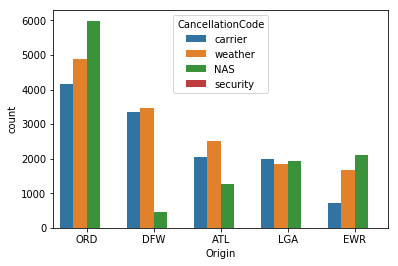

In [96]:
sb.countplot(data = df_2008_most_cancelled, x = 'Origin', hue = 'CancellationCode',
            order=df_2008_most_cancelled.Origin.value_counts().index);

- ORD and EWR had their most cancellations due to NAS
- DFW and ATL had their most cancellations due to wether 
- LGA had its most cancellation due to carrier

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There were no discernable relationships between the Arrival delay and the numeric variables distance and departure time. I did try some log and square transforms, but no observable pattern emerged.
<br>
> Of the categorical variables, origin/destination city has too many values for a sensible plot to be drawn. So limited analysis has been done on the top 5 origin cities

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> None

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

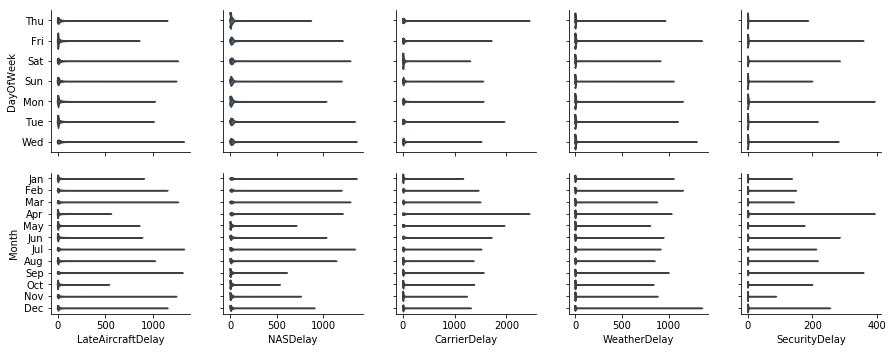

In [97]:
# Checking the individual flight delay types over day of the week and Month
g = sb.PairGrid(data = df_2008, x_vars = ['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay'],
                y_vars = ['DayOfWeek','Month'])
g.map(sb.violinplot, inner = 'quartile')

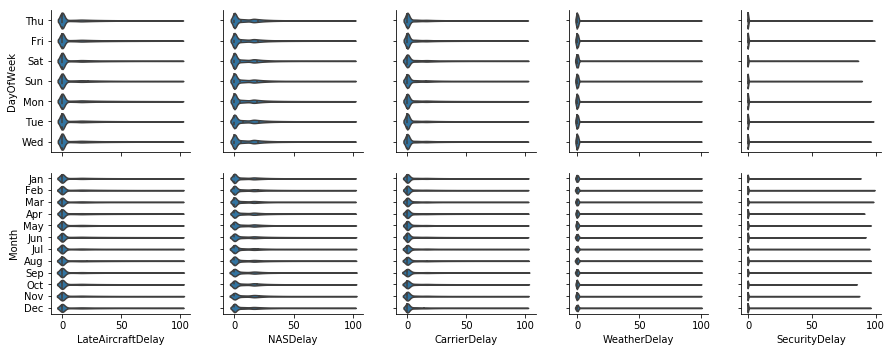

In [100]:
# Trying out after removing the large outliers
g = sb.PairGrid(data = df_2008_subset, x_vars = ['LateAircraftDelay', 'NASDelay', 'CarrierDelay', 'WeatherDelay', 'SecurityDelay'],
                y_vars = ['DayOfWeek','Month'])
g.map(sb.violinplot, inner = 'quartile')

The variance seem to be the highest for NASDelay and the lowest for Security delay

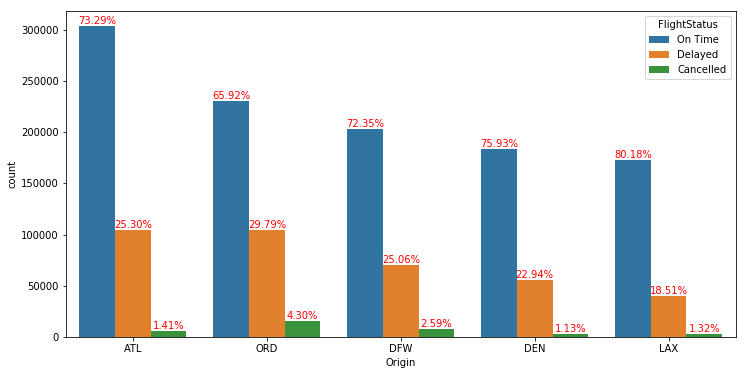

In [101]:
#observing the distribution of flight status for the 5 busiest airports
plt.figure(figsize=[12, 6])
top_5_origin_list = df_2008['Origin'].value_counts().nlargest(5).keys()
df_2008_top_5_origin = df_2008.loc[df_2008['Origin'].isin(top_5_origin_list)]

ax = sb.countplot(data = df_2008_top_5_origin, x = 'Origin', hue = 'FlightStatus',
            order=df_2008_top_5_origin.Origin.value_counts().index,
            hue_order=['On Time', 'Delayed', 'Cancelled'], palette=["C0", "C1","C2"])
totals = df_2008_top_5_origin.Origin.value_counts().values
total_count = 0
loop_count = 0
for p in ax.patches:
    if (loop_count % 5 == 0):
        total_count = 0
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height*100/totals[total_count]),
            ha="center", va='bottom', color = 'r')
    loop_count = loop_count + 1
    total_count = total_count + 1
plt.show();

The flight status distribution for each of the 5 busiest airports is provided above.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The variance for NAS delay seems to be higher than the rest of the delay factors. Other than that a clustered bar plot for the flight status of the 5 busiest airports was plotted.

### Were there any interesting or surprising interactions between features?

> None noted